In [ ]:
# Colin Glory 3/1/2024

In [2]:
# Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

# imputer for missing data
from sklearn.impute import SimpleImputer

In [3]:
# Importing dataset and assigning it
revenue = pd.read_csv('dssa5201_annual_revenue_inference.csv')
print(revenue.shape)
revenue.head()

(791242, 4)


,company_record_id,estimated_number_employees,time_in_business,annual_revenue
0,4e6f6c1c-930b-401b-9d41-160b21beaf82-W3VAj2fkn...,4,48,NaN
1,7e7afb56-92da-4a95-b884-df7cc7a1ed3e-SBUho6F8i...,3,10,NaN
2,b798c1ac-7d85-43b8-b9c2-ea1a3b493d41-SBUho6F8i...,3,23,NaN
3,789afae7-138a-4a3c-80dd-1ef54651f7f2-8Mrkv62pC...,1,10,NaN
4,34593385-a7a0-45c7-9b03-a9e21202f7f2-f97BTCYPv...,30,9,NaN


In [4]:
# Null value check. Annual Revenue has quite a lot.
revenue.isnull().sum()

company_record_id                  0
estimated_number_employees         0
time_in_business                   0
annual_revenue                362116
dtype: int64

In [7]:
# Descriptive analytics
revenue.describe

<bound method NDFrame.describe of                                         company_record_id  \
0       4e6f6c1c-930b-401b-9d41-160b21beaf82-W3VAj2fkn...   
1       7e7afb56-92da-4a95-b884-df7cc7a1ed3e-SBUho6F8i...   
2       b798c1ac-7d85-43b8-b9c2-ea1a3b493d41-SBUho6F8i...   
3       789afae7-138a-4a3c-80dd-1ef54651f7f2-8Mrkv62pC...   
4       34593385-a7a0-45c7-9b03-a9e21202f7f2-f97BTCYPv...   
...                                                   ...   
791237  86fe85d3-967f-482e-a93d-371035797ed1-SBUho6F8i...   
791238  00cbcebf-23b1-4fa8-bade-287a85bff6c3-SBUho6F8i...   
791239  8a3796f0-6427-4f86-adbc-98c81dd082e7-SBUho6F8i...   
791240  9477e2be-fe0a-41a7-98bf-602e3f2da021-8Mrkv62pC...   
791241  350aa59d-c8cd-422e-9298-5e2f124d7073-7jrZye2KJ...   

        estimated_number_employees  time_in_business  annual_revenue  
0                                4                48             NaN  
1                                3                10             NaN  
2                   

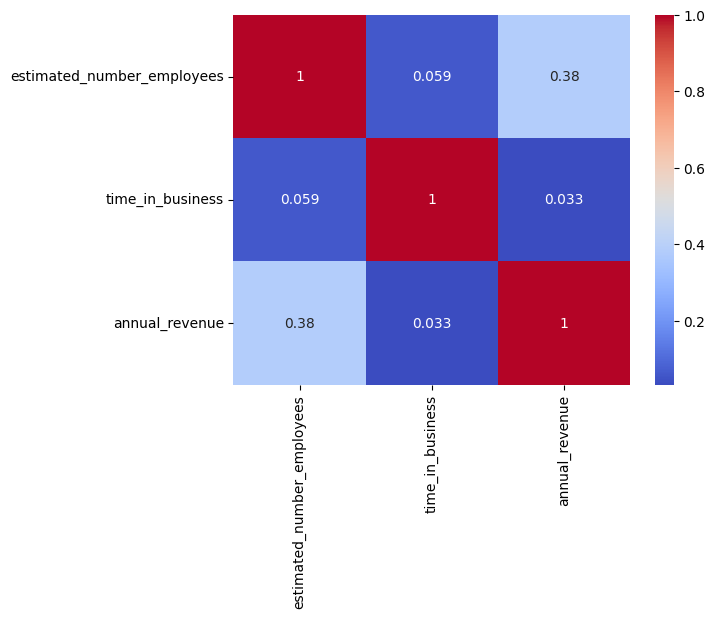

In [9]:
# Heat Map Analysis (excludes record_id)
# Select only numerical columns for correlation analysis
numerical_columns = revenue.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
correlation_matrix = revenue[numerical_columns].corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Insights:

# Estimated Number of Employees vs. Time in Business: There is a weak positive correlation of 0.059. This suggests that as the estimated number of employees increases, the time in business also tends to increase slightly.

# Estimated Number of Employees vs. Annual Revenue: There is a moderate positive correlation of 0.38. This indicates that companies with more employees tend to have higher annual revenue.

# Time in Business vs. Annual Revenue: There is a weak positive correlation of 0.033. This suggests that companies that have been in business longer tend to have slightly higher annual revenue.

Text(0, 0.5, 'Annual Revenue ($)')

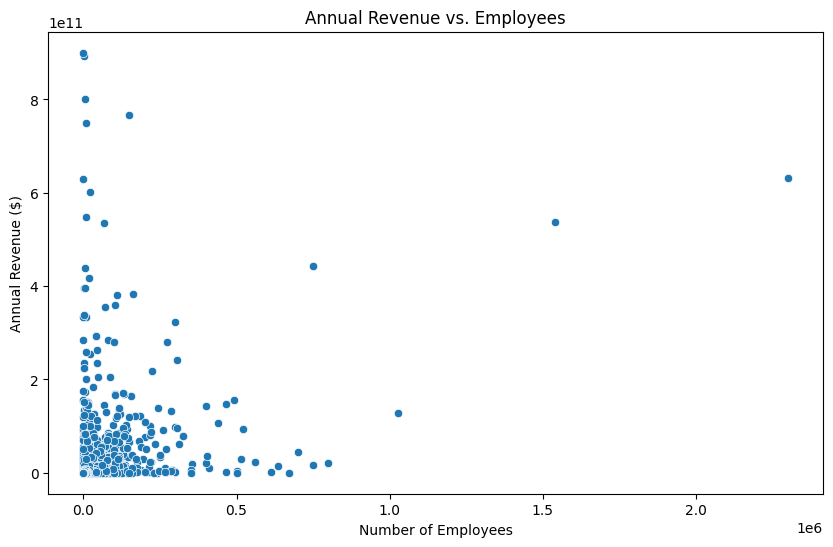

In [5]:
# Scatter plot for Annual Revenue vs. Number of Employees (considering these are key features)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=revenue, x='estimated_number_employees', y='annual_revenue')
plt.title('Annual Revenue vs. Employees')
plt.xlabel('Number of Employees')
plt.ylabel('Annual Revenue ($)')

# Insights:

# There is a huge cluster of data in the bottom left corner
# An insight can possibly be that the lower amount of employees = higher revenue

Text(0, 0.5, 'Annual Revenue ($)')

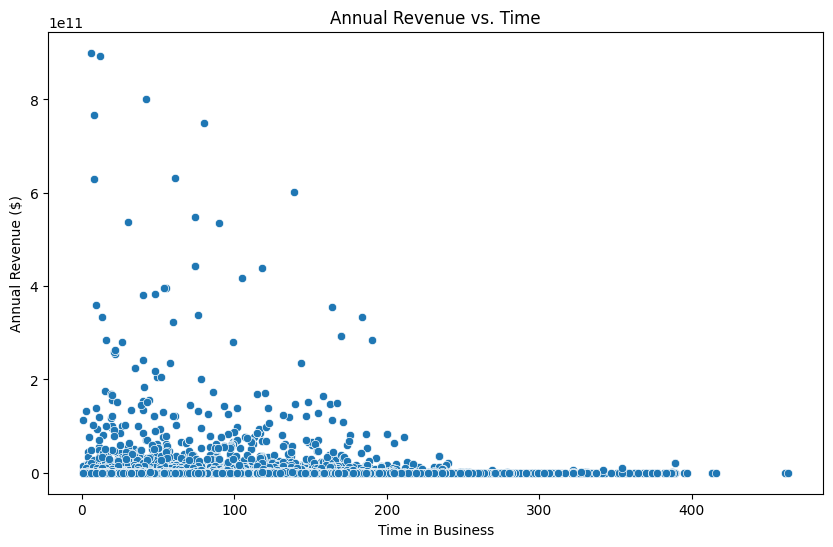

In [6]:
# Scatter plot for Annual Revenue vs. Time in Business (considering these are key features)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=revenue, x='time_in_business', y='annual_revenue')
plt.title('Annual Revenue vs. Time')
plt.xlabel('Time in Business')
plt.ylabel('Annual Revenue ($)')

# Insights:

# Majority of the data lies very close to the x axis. This implies that a lot of businesses may have been around for a while & not make too much money.
# Another insight can be that companies below the 200 mark, seem to have a better chance at having a higher annual revenue.

In [34]:
# Separating null values and setting it to test data
test_data = revenue[revenue["annual_revenue"].isnull()]

In [35]:
# Contains the null values
test_data

,company_record_id,estimated_number_employees,time_in_business,annual_revenue
0,4e6f6c1c-930b-401b-9d41-160b21beaf82-W3VAj2fkn...,4,48,NaN
1,7e7afb56-92da-4a95-b884-df7cc7a1ed3e-SBUho6F8i...,3,10,NaN
2,b798c1ac-7d85-43b8-b9c2-ea1a3b493d41-SBUho6F8i...,3,23,NaN
3,789afae7-138a-4a3c-80dd-1ef54651f7f2-8Mrkv62pC...,1,10,NaN
4,34593385-a7a0-45c7-9b03-a9e21202f7f2-f97BTCYPv...,30,9,NaN
...,...,...,...,...
791235,d191b316-4aba-4968-b8a3-f7c4fd74c703-8Mrkv62pC...,1,4,NaN
791236,9dc42fec-f664-43f9-8769-8d4ae82f8dce-8Mrkv62pC...,1,13,NaN
791237,86fe85d3-967f-482e-a93d-371035797ed1-SBUho6F8i...,1,7,NaN
791238,00cbcebf-23b1-4fa8-bade-287a85bff6c3-SBUho6F8i...,18,4,NaN


In [36]:
# Drop the null values from the revenue data frame and then consider it as train data
revenue.dropna(inplace=True)

In [37]:
revenue

,company_record_id,estimated_number_employees,time_in_business,annual_revenue
10,c35940c8-25ec-4140-9ebd-c66e33456f6f-8Mrkv62pC...,2,13,12000000.0
12,d32b79a0-0f1d-4ec7-98f0-ee2d1a565e02-W3VAj2fkn...,1,19,8578000.0
13,6ca38211-335a-4979-a133-95ae28994428-SBUho6F8i...,1,20,2400000.0
16,4a563b55-469e-4605-9566-a8da1de77539-8Mrkv62pC...,4,13,19144000.0
17,473c8185-bb85-424d-8c25-1f147a64a922-SBUho6F8i...,1,7,3841000.0
...,...,...,...,...
791224,a76e6d03-202f-4669-a7bb-f113dcf4562b-W3VAj2fkn...,10,9,26484000.0
791226,a606928b-09d5-45bd-b00b-b5ce5b7f40f5-8Mrkv62pC...,2,13,31193000.0
791229,11a2cd4a-2548-42f6-af44-54a34857b3c4-W3VAj2fkn...,5,19,4292000.0
791239,8a3796f0-6427-4f86-adbc-98c81dd082e7-SBUho6F8i...,97,32,26185000.0


In [38]:
# Null value check for train data. There are no more.
revenue.isnull().sum()

company_record_id             0
estimated_number_employees    0
time_in_business              0
annual_revenue                0
dtype: int64

In [39]:
# Rows and column check
revenue.shape

(429126, 4)

In [40]:
# y train set-up. Takes the rows from train data with non-null values
y_train = revenue["annual_revenue"]

In [41]:
y_train

10        12000000.0
12         8578000.0
13         2400000.0
16        19144000.0
17         3841000.0
             ...    
791224    26484000.0
791226    31193000.0
791229     4292000.0
791239    26185000.0
791240    27314000.0
Name: annual_revenue, Length: 429126, dtype: float64

In [42]:
y_train.shape

(429126,)

In [43]:
# x train set-up. Takes the non-null values of everything except annual revenue. Also drops record id due to it not having any sort of impact.
X_train = revenue.drop(["annual_revenue","company_record_id"], axis = 1)

In [44]:
X_train

,estimated_number_employees,time_in_business
10,2,13
12,1,19
13,1,20
16,4,13
17,1,7
...,...,...
791224,10,9
791226,2,13
791229,5,19
791239,97,32


In [45]:
X_train.shape

(429126, 2)

In [46]:
# Linear Regression
lr = LinearRegression()

In [47]:
# Training the train data
lr.fit(X_train, y_train)

LinearRegression()

In [48]:
# Creation of x test from test data. Drops annual_revenue and record_id
# All data without annual_revenue with null values
X_test = test_data.drop(["annual_revenue","company_record_id"], axis=1)

In [49]:
X_test

,estimated_number_employees,time_in_business
0,4,48
1,3,10
2,3,23
3,1,10
4,30,9
...,...,...
791235,1,4
791236,1,13
791237,1,7
791238,18,4


In [50]:
X_test.shape

(362116, 2)

In [51]:
# Applying linear regression on the test data to predict missing values
y_pred = lr.predict(X_test)

In [52]:
y_pred

array([82201684.63284048, 17999933.16829471, 39875822.15585931, ...,
       12437960.70783514, 11756046.91823445, 12039425.98249951])

In [53]:
y_pred.shape

(362116,)

In [54]:
# Replaces missing values with predicted 
test_data.loc[test_data.annual_revenue.isnull(),"annual_revenue"] = y_pred

In [55]:
test_data

,company_record_id,estimated_number_employees,time_in_business,annual_revenue
0,4e6f6c1c-930b-401b-9d41-160b21beaf82-W3VAj2fkn...,4,48,8.220168e+07
1,7e7afb56-92da-4a95-b884-df7cc7a1ed3e-SBUho6F8i...,3,10,1.799993e+07
2,b798c1ac-7d85-43b8-b9c2-ea1a3b493d41-SBUho6F8i...,3,23,3.987582e+07
3,789afae7-138a-4a3c-80dd-1ef54651f7f2-8Mrkv62pC...,1,10,1.748624e+07
4,34593385-a7a0-45c7-9b03-a9e21202f7f2-f97BTCYPv...,30,9,2.325199e+07
...,...,...,...,...
791235,d191b316-4aba-4968-b8a3-f7c4fd74c703-8Mrkv62pC...,1,4,7.389679e+06
791236,9dc42fec-f664-43f9-8769-8d4ae82f8dce-8Mrkv62pC...,1,13,2.253452e+07
791237,86fe85d3-967f-482e-a93d-371035797ed1-SBUho6F8i...,1,7,1.243796e+07
791238,00cbcebf-23b1-4fa8-bade-287a85bff6c3-SBUho6F8i...,18,4,1.175605e+07


In [32]:
# Exports to csv file
test_data.to_csv('predicted.csv', index=False)